<h1 align="center"><font size="5"> Classification</font></h1>

### Business Problem


You work for a small bank and are responsible for determining if customers are creditworthy to give a loan to. Your team typically gets 200 loan applications per week and approves them by hand.

Due to a financial scandal that hit a competitive bank last week, you suddenly have an influx of new people applying for loans for your bank instead of the other bank in your city. All of a sudden you have nearly 500 loan applications to process this week!

Your manager sees this new influx as a great opportunity and wants you to figure out how to process all of these loan applications within one week.

For this project, you will analyze the business problem using the Problem Solving Framework and provide a list of creditworthy customers to your manager in the next two days.

You have the following information to work with:

Data on all past applications.
The list of customers that need to be processed in the next few days

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report


In [2]:
df = pd.read_excel('credit-data-training.xlsx')
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


<h2 id="preprocessing">Data pre-processing and selection</h2>


In [3]:
missing_data=df.isnull()
data = df.notnull()

In [4]:
for column in missing_data:
    print(column)
    print(missing_data[column].value_counts())
    print("")

Credit-Application-Result
False    500
Name: Credit-Application-Result, dtype: int64

Account-Balance
False    500
Name: Account-Balance, dtype: int64

Duration-of-Credit-Month
False    500
Name: Duration-of-Credit-Month, dtype: int64

Payment-Status-of-Previous-Credit
False    500
Name: Payment-Status-of-Previous-Credit, dtype: int64

Purpose
False    500
Name: Purpose, dtype: int64

Credit-Amount
False    500
Name: Credit-Amount, dtype: int64

Value-Savings-Stocks
False    500
Name: Value-Savings-Stocks, dtype: int64

Length-of-current-employment
False    500
Name: Length-of-current-employment, dtype: int64

Instalment-per-cent
False    500
Name: Instalment-per-cent, dtype: int64

Guarantors
False    500
Name: Guarantors, dtype: int64

Duration-in-Current-address
True     344
False    156
Name: Duration-in-Current-address, dtype: int64

Most-valuable-available-asset
False    500
Name: Most-valuable-available-asset, dtype: int64

Age-years
False    488
True      12
Name: Age-years, dt

C:\Users\12024\Anaconda2\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


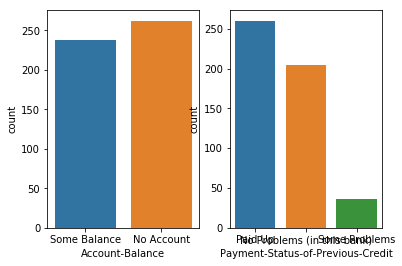

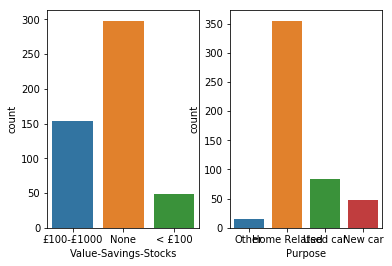

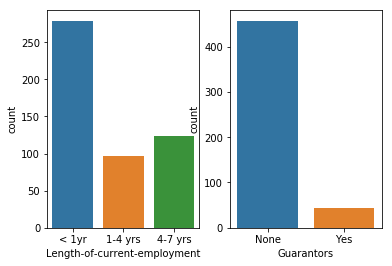

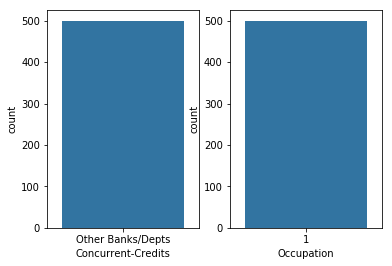

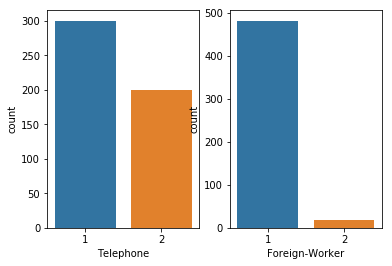

In [5]:
fig, ax =plt.subplots(1,2)
sns.countplot(df['Account-Balance'], ax=ax[0])
sns.countplot(df['Payment-Status-of-Previous-Credit'], ax=ax[1])
fig.show()

fig, ax =plt.subplots(1,2)
sns.countplot(df['Value-Savings-Stocks'], ax=ax[0])
sns.countplot(df['Purpose'], ax=ax[1])
fig.show()

fig, ax =plt.subplots(1,2)
sns.countplot(df['Length-of-current-employment'], ax=ax[0])
sns.countplot(df['Guarantors'], ax=ax[1])
fig.show()

fig, ax =plt.subplots(1,2)
sns.countplot(df['Concurrent-Credits'], ax=ax[0])
sns.countplot(df['Occupation'], ax=ax[1])
fig.show()

fig, ax =plt.subplots(1,2)
sns.countplot(df['Telephone'], ax=ax[0])
sns.countplot(df['Foreign-Worker'], ax=ax[1])
fig.show()

* __Age-years__ and __Duration-in-Current-address__ fields contains 2% and 69% of missing values respectively.
* For the field __Age-years__, missing value is very low, imputed the missing data with Median of the field Age-years.
* Since there is a large number of missing data, __Duration-in-Current-address__ is removed.
* The low variability fields __Concurrent Credt__ and __Occupation__ only have one value, so we remove them as well.
* The string field __Guarantors__ have only 2 number of unique values i.e Yes and None. Yes has 43 values and None has 457 values. This seem low variability field, so we remove this as well
* The numeric fields __Foreign Worker__, __NO. of dependents__ and __Telephone__ have a very small number of unique values. They seem to be categorical fields with low variability, so they are removed as well.


In [6]:
df = df.drop(['Duration-in-Current-address'], axis=1)
df = df.fillna(df['Age-years'].median())
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,1,33.0,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [7]:
df = df.drop(['Guarantors','Occupation','Telephone','Foreign-Worker','Concurrent-Credits','No-of-dependents'],axis = 1)
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


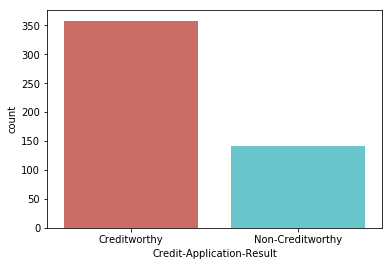

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x= 'Credit-Application-Result', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [9]:
dummies = pd.get_dummies(df[['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank']])

data = pd.concat([df, dummies], axis=1)

data = data.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'], axis= 1)

data['Credit-Application-Result'] = df['Credit-Application-Result'].replace(['Creditworthy','Non-Creditworthy'],[0,1]) 
data.head()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),...,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,0,4,1494,1,1,33.0,2,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,0,4,1494,1,1,29.0,2,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,0,4,1544,2,1,42.0,2,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,0,4,3380,1,1,37.0,2,0,1,1,...,0,0,0,1,0,1,0,0,1,0
4,0,6,343,4,1,27.0,2,1,0,0,...,0,0,0,1,0,0,0,1,1,0


In [10]:
X = np.asarray(data.loc[:, ~data.columns.isin(['Credit-Application-Result'])])
X[0:5]

array([[4.000e+00, 1.494e+03, 1.000e+00, 1.000e+00, 3.300e+01, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [4.000e+00, 1.494e+03, 1.000e+00, 1.000e+00, 2.900e+01, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [4.000e+00, 1.544e+03, 2.000e+00, 1.000e+00, 4.200e+01, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [4.000e+00, 3.380e+03, 1.000e+00, 1.000e+00, 3.700e+01, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000

In [11]:
y = data['Credit-Application-Result']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Credit-Application-Result, dtype: int64

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.4179625 , -0.60312795, -1.80656369, -1.279154  , -0.22662058,
         0.13351294, -1.04920939,  1.04920939, -0.83017419,  0.96076892,
        -0.27854301, -1.56469673, -0.32210675,  5.6862407 , -0.44613985,
        -0.32587527, -1.21459768,  1.49891736, -0.49060655, -0.57427105,
         0.89000826,  0.75      , -0.75      ],
       [-1.4179625 , -0.60312795, -1.80656369, -1.279154  , -0.5787893 ,
         0.13351294, -1.04920939,  1.04920939, -0.83017419,  0.96076892,
        -0.27854301,  0.63910148, -0.32210675, -0.17586311, -0.44613985,
        -0.32587527, -1.21459768,  1.49891736, -0.49060655, -0.57427105,
         0.89000826,  0.75      , -0.75      ],
       [-1.4179625 , -0.58545107, -0.90777578, -1.279154  ,  0.56575906,
         0.13351294, -1.04920939,  1.04920939,  1.20456647, -1.040833  ,
        -0.27854301,  0.63910148, -0.32210675, -0.17586311, -0.44613985,
        -0.32587527,  0.82331789, -0.66714819,  2.0382932 , -0.57427105,
        -1.12358508, -1.3333

## Train/Test dataset

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

('Train set:', (350L, 23L), (350L,))
('Test set:', (150L, 23L), (150L,))


## Logistic Regression Model

In [14]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
yhat = LR.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [16]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.6247574 , 0.3752426 ],
       [0.78267784, 0.21732216],
       [0.41517789, 0.58482211],
       [0.67986073, 0.32013927],
       [0.71729882, 0.28270118],
       [0.62847217, 0.37152783],
       [0.5774539 , 0.4225461 ],
       [0.3830008 , 0.6169992 ],
       [0.32419829, 0.67580171],
       [0.71407901, 0.28592099],
       [0.66794216, 0.33205784],
       [0.65572087, 0.34427913],
       [0.38666287, 0.61333713],
       [0.60080282, 0.39919718],
       [0.589799  , 0.410201  ],
       [0.70755209, 0.29244791],
       [0.6227573 , 0.3772427 ],
       [0.33053958, 0.66946042],
       [0.58826502, 0.41173498],
       [0.67575962, 0.32424038],
       [0.50548906, 0.49451094],
       [0.71206427, 0.28793573],
       [0.74920858, 0.25079142],
       [0.57936091, 0.42063909],
       [0.76564707, 0.23435293],
       [0.48979791, 0.51020209],
       [0.6119599 , 0.3880401 ],
       [0.47948296, 0.52051704],
       [0.53090848, 0.46909152],
       [0.67587113, 0.32412887],
       [0.

###### Evaluation

In [17]:
print("Accuracy of a Logistic Regression:",accuracy_score(y_test, yhat))
print('F1 Score of a Logistic Regression:', f1_score(y_test, yhat, average='weighted'))

('Accuracy of a Logistic Regression:', 0.7933333333333333)
('F1 Score of a Logistic Regression:', 0.787450216698169)


###### Confusion matrix

In [18]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[95 12]
 [19 24]]


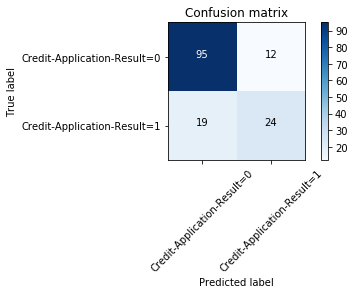

In [19]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Credit-Application-Result=0','Credit-Application-Result=1'],normalize= False,  title='Confusion matrix')

### Decision Tree Model

In [21]:
clf = DecisionTreeClassifier(criterion="gini", max_depth = 4)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
predTree = clf.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
66     0
152    0
123    1
285    0
70     0
Name: Credit-Application-Result, dtype: int64


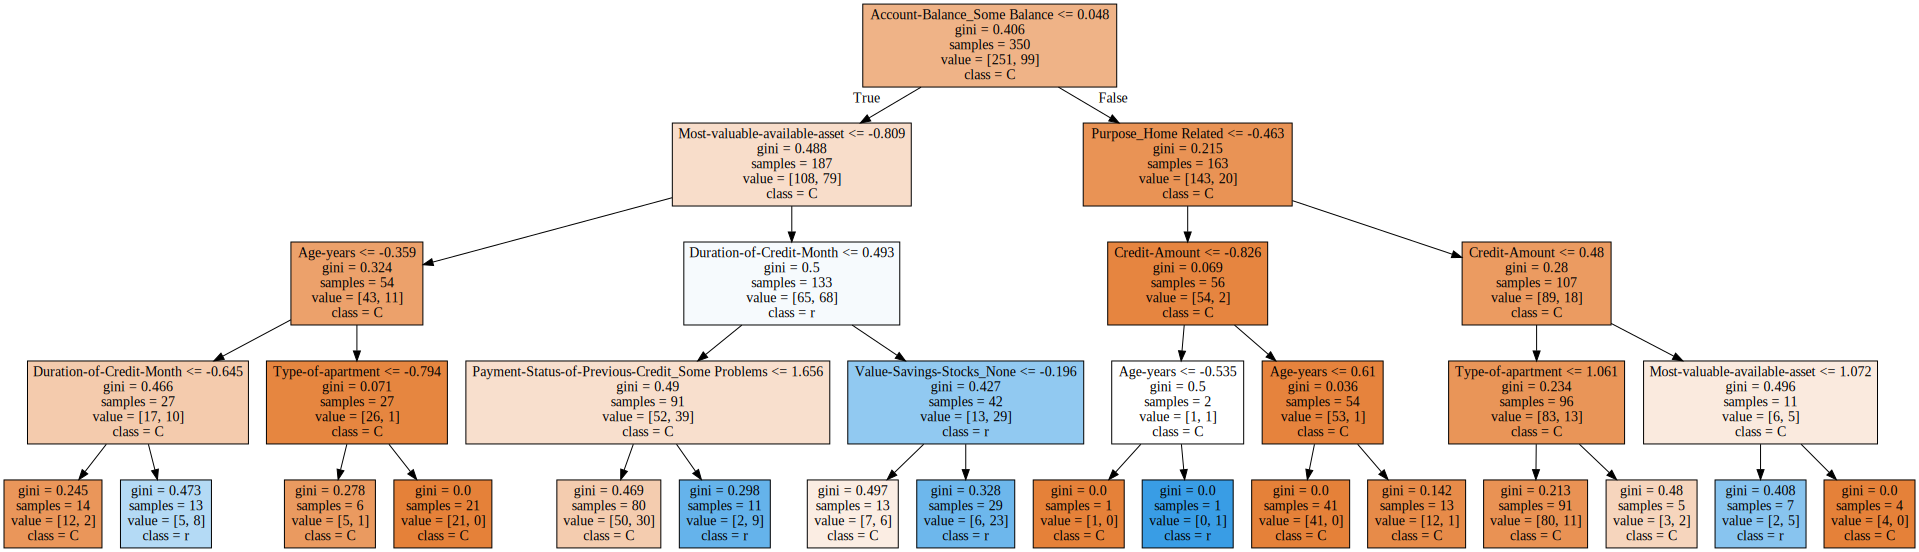

In [24]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= data.columns[1:26],  
                                class_names=list(data.columns[0]),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

##### Evaluation

In [25]:
print("Accuracy of a Decision Tree Model:",accuracy_score(y_test, predTree))
print('F1 Score of a Decision Tree Model:', f1_score(y_test, predTree, average='weighted'))

('Accuracy of a Decision Tree Model:', 0.7666666666666667)
('F1 Score of a Decision Tree Model:', 0.7525717619133829)


Confusion matrix, without normalization
[[96 11]
 [24 19]]


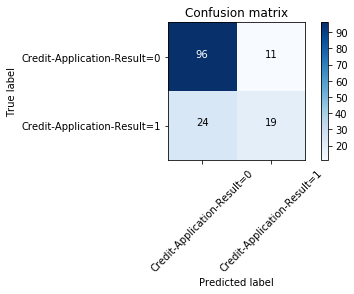

In [26]:
cnf_matrix = confusion_matrix(y_test, predTree, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Credit-Application-Result=0','Credit-Application-Result=1'],normalize= False,  title='Confusion matrix')

<h2>Forest Model</h2>

In [27]:
RFC = RandomForestClassifier(criterion="entropy", max_depth = 4, n_estimators=100)
RFC # it shows the default parameters

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
predRand = RFC.predict(X_test)
print (predRand [0:5])
print (y_test[0:5])

[0 0 0 0 0]
66     0
152    0
123    1
285    0
70     0
Name: Credit-Application-Result, dtype: int64


##### Visualization

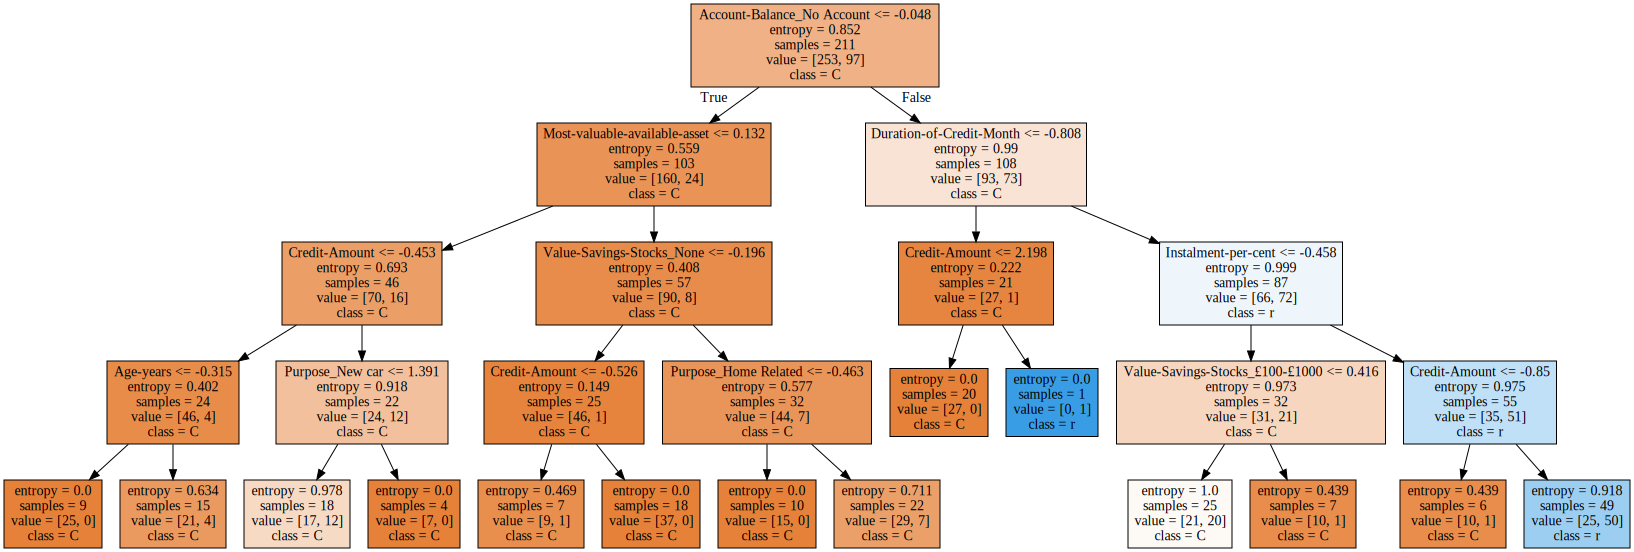

In [30]:
dot_data = tree.export_graphviz(RFC.estimators_[0], out_file=None, 
                                feature_names= data.columns[1:26],  
                                class_names=list(data.columns[0]),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [31]:
print("Accuracy of a Random Forest Model:",accuracy_score(y_test, predRand))
print('F1 Score of a Random Forest Model:', f1_score(y_test, predRand, average='weighted'))

('Accuracy of a Random Forest Model:', 0.7933333333333333)
('F1 Score of a Random Forest Model:', 0.7576219612255901)


Confusion matrix, without normalization
[[105   2]
 [ 29  14]]


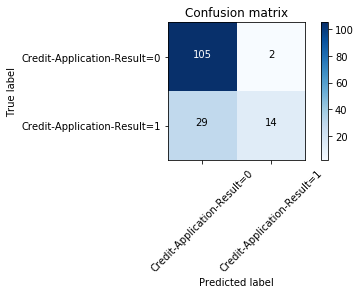

In [32]:
cnf_matrix = confusion_matrix(y_test, predRand, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Credit-Application-Result=0','Credit-Application-Result=1'],normalize= False,  title='Confusion matrix')

### Gradient Boosting

In [33]:
GBC = GradientBoostingClassifier(random_state=42)
GBC 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [34]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [35]:
predGBC = GBC.predict(X_test)
print (predGBC[0:5])
print (y_test[0:5])

[0 0 1 0 0]
66     0
152    0
123    1
285    0
70     0
Name: Credit-Application-Result, dtype: int64


In [36]:
print("Accuracy of a Gradient Boosting Model:",accuracy_score(y_test, predGBC))
print('F1 Score of a Gradient Boosting Model :', f1_score(y_test, predGBC, average='weighted'))

('Accuracy of a Gradient Boosting Model:', 0.7533333333333333)
('F1 Score of a Gradient Boosting Model :', 0.7384330054512905)


Confusion matrix, without normalization
[[95 12]
 [25 18]]


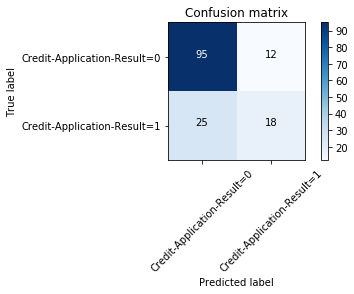

In [37]:
cnf_matrix = confusion_matrix(y_test, predGBC, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Credit-Application-Result=0','Credit-Application-Result=1'],normalize= False,  title='Confusion matrix')

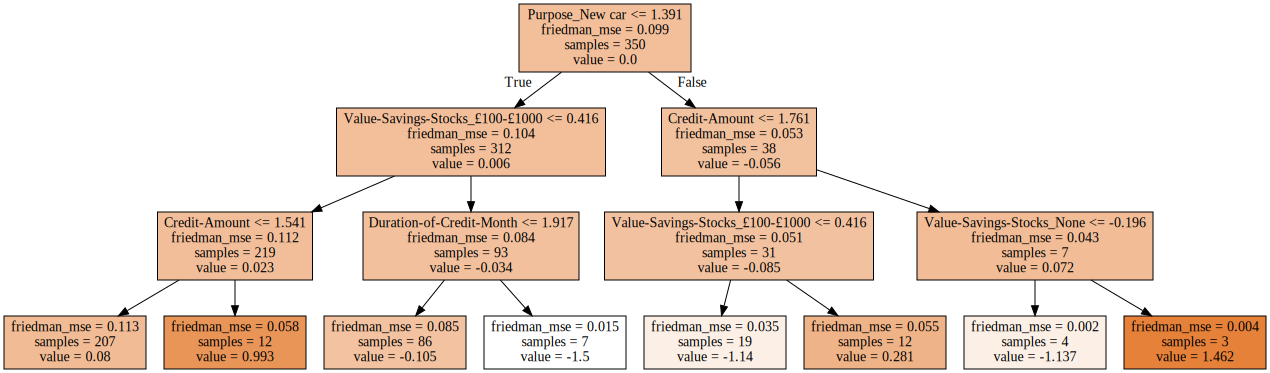

In [38]:
dot_data = tree.export_graphviz(GBC.estimators_[42,0], out_file=None, 
                                feature_names= data.columns[1:26],  
                                class_names=list(data.columns[0]),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

The overall percent accuracy of the __Logistic Regression model__ is 79% which is strong.
  <li>Precision= true positives \ (true positives + false positives) = 95/ (95+12) =.88</li>
  <li>Recall= true negatives \ (true negatives + false negatives) = 24/ (24+19) = .55</li>
  <li>F1 Score = 78%</li>
So after checking confusion matrix there is bias seen in the model's prediction to Creditworthy.


The overall percent accuracy of the __Decision Tree model__ is 76%, which is strong.
<li>Precision= true positives \ (true positives + false positives) = 96/ (96+11) =.89</li>
<li>Recall= true negatives \ (true negatives + false negatives) = 19/ (19+24) = .44</li>
<li>F1 Score = 75%</li>
So after checking confusion matrix there is bias seen in the model's prediction to Creditworthy.


The overall percent accuracy of the __Random Forest model__ is 79%, which is strong.
<li>Precision= true positives \ (true positives + false positives) = 104/ (104+3) =.97</li>
<li>Recall= true negatives \ (true negatives + false negatives) = 15/ (15+28) = .35</li>
<li>F1 Score = 76%</li>
So after checking confusion matrix there is bias seen in the model's prediction to Creditworthy.

The overall percent accuracy of the __Boosted model__ is 75%, which is strong.
<li>Precision= true positives \ (true positives + false positives) = 95/ (95+12) =.88</li>
<li>Recall= true negatives \ (true negatives + false negatives) = 18/ (18+25) = .42</li>
<li>F1 Score = 74%</li>
So after checking confusion matrix there is bias seen in the model's prediction to Creditworthy.</p>
    


Mixing Overall Accuracy, Accuracies within Creditworthy and Non-Creditworthy values and F1 score. I have chosen Logistic Regression is the best model because this model have higher accuracy. 

In [39]:
df_new = pd.read_excel('customers-to-score.xlsx')
df_new.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1


In [40]:
df_new = df_new.drop(['Duration-in-Current-address','Guarantors','Occupation','Telephone','Foreign-Worker','Concurrent-Credits','No-of-dependents'],axis = 1)
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [41]:
dummies = pd.get_dummies(df_new[['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank']])

data_new = pd.concat([df_new, dummies], axis=1)

data_new = data_new.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'], axis= 1)

data_new.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,...,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,9,2799,2,1,36,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,12,2122,3,1,39,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,24,3758,1,4,23,1,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
3,11,3905,2,1,36,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,6,1957,1,3,31,2,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [42]:
Purpose_Other = pd.Series([]) 
for i in range(len(data_new)): 
    Purpose_Other[i]=0
data_new.insert(15, 'Purpose_Other', Purpose_Other)     
data_new.shape

(500, 23)

In [43]:
X = np.asarray(data_new.loc[:])
X[0:5]

array([[   9, 2799,    2,    1,   36,    1,    1,    0,    1,    0,    0,
           1,    0,    0,    0,    0,    1,    0,    0,    0,    1,    0,
           1],
       [  12, 2122,    3,    1,   39,    1,    1,    0,    1,    0,    0,
           1,    0,    0,    0,    0,    1,    0,    0,    0,    1,    0,
           1],
       [  24, 3758,    1,    4,   23,    1,    1,    0,    0,    1,    0,
           1,    0,    0,    0,    0,    0,    1,    0,    0,    1,    1,
           0],
       [  11, 3905,    2,    1,   36,    1,    1,    0,    1,    0,    0,
           1,    0,    0,    0,    0,    1,    0,    0,    0,    1,    0,
           1],
       [   6, 1957,    1,    3,   31,    2,    1,    0,    1,    0,    0,
           1,    0,    0,    0,    0,    1,    0,    1,    0,    0,    1,
           0]], dtype=int64)

In [44]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\12024\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.96, -0.18, -0.85, -1.28,  0.03, -1.76,  0.88, -0.88,  1.36,
        -1.09, -0.34,  0.64, -0.34, -0.48, -0.35,  0.  ,  0.82, -0.64,
        -0.43, -0.6 ,  0.85, -1.29,  1.29],
       [-0.7 , -0.42,  0.04, -1.28,  0.3 , -1.76,  0.88, -0.88,  1.36,
        -1.09, -0.34,  0.64, -0.34, -0.48, -0.35,  0.  ,  0.82, -0.64,
        -0.43, -0.6 ,  0.85, -1.29,  1.29],
       [ 0.32,  0.16, -1.75,  1.59, -1.12, -1.76,  0.88, -0.88, -0.74,
         0.92, -0.34,  0.64, -0.34, -0.48, -0.35,  0.  , -1.22,  1.56,
        -0.43, -0.6 ,  0.85,  0.77, -0.77],
       [-0.79,  0.22, -0.85, -1.28,  0.03, -1.76,  0.88, -0.88,  1.36,
        -1.09, -0.34,  0.64, -0.34, -0.48, -0.35,  0.  ,  0.82, -0.64,
        -0.43, -0.6 ,  0.85, -1.29,  1.29],
       [-1.21, -0.48, -1.75,  0.63, -0.41,  0.14,  0.88, -0.88,  1.36,
        -1.09, -0.34,  0.64, -0.34, -0.48, -0.35,  0.  ,  0.82, -0.64,
         2.33, -0.6 , -1.18,  0.77, -0.77]])

In [45]:
predY = LR.predict(X)
print (predY [0:5])

[0 0 0 0 0]


In [46]:
df_new['Credit-Application-Result'] =  predY
df_new.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Credit-Application-Result
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,1,36,1,More than 1,0
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,1,39,1,More than 1,0
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,1,1,0
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,1,36,1,More than 1,0
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,3,31,2,1,0


In [47]:
creditworthy = df_new[df_new['Credit-Application-Result']==0]
creditworthy.shape

(382, 13)

__Answer:__
The number of customers who are creditworthy are 382.